Notebook purpose:

- Investigate whether I can see where extra money goes.

In [94]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/mdb_eval")
import src.data.aggregators as agg
import src.data.make_data as md
import src.data.selectors as sl
import src.data.transformers as tf
import src.helpers.data as hd
import src.helpers.io as io

fs = s3fs.S3FileSystem(profile="3di")

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = hd.read_txn_data("111")
hd.inspect(df)

Time for read_txn_data                 : 2.00 minutes
shape: (593,133, 35), users: 270


,date,user_id,amount,desc,merchant,tag_group,tag_spend,user_registration_date,account_created,account_id,account_last_refreshed,account_provider,account_type,birth_year,data_warehouse_date_created,data_warehouse_date_last_updated,id,is_debit,is_female,is_sa_flow,is_salary_pmt,is_urban,latest_balance,lsoa,merchant_business_line,msoa,postcode,region_name,salary_range,tag,tag_auto,tag_manual,tag_up,updated_flag,ym
0,2012-01-03,111,-114.0,<mdbremoved>,NaN,NaN,NaN,2010-06-19,2016-10-30,235634,2018-08-08 10:24:00,lloyds bank,current,NaN,2014-07-18,2015-03-19,397323,False,0.0,False,False,1.0,0.5,e01001036,NaN,e02000222,cr2 7,london,,NaN,NaN,no tag,no tag,u,2012-01
1,2012-01-03,111,8.5,<mdbremoved>,NaN,NaN,NaN,2010-06-19,2016-10-30,235634,2018-08-08 10:24:00,lloyds bank,current,NaN,2014-07-18,2015-03-19,397324,True,0.0,False,False,1.0,0.5,e01001036,NaN,e02000222,cr2 7,london,,NaN,NaN,no tag,no tag,u,2012-01


## Other savings

### Flows into investment service accounts

### Transfers to non-linked (savings) accounts

Method 1: use user defined tag

Method 2: use overall tfrs

## Debt paydown

### Flows into credit card accounts

### Loan repayments

In [145]:
dfa = hd.read_analysis_data("XX0")

<AxesSubplot:xlabel='month_income', ylabel='Density'>

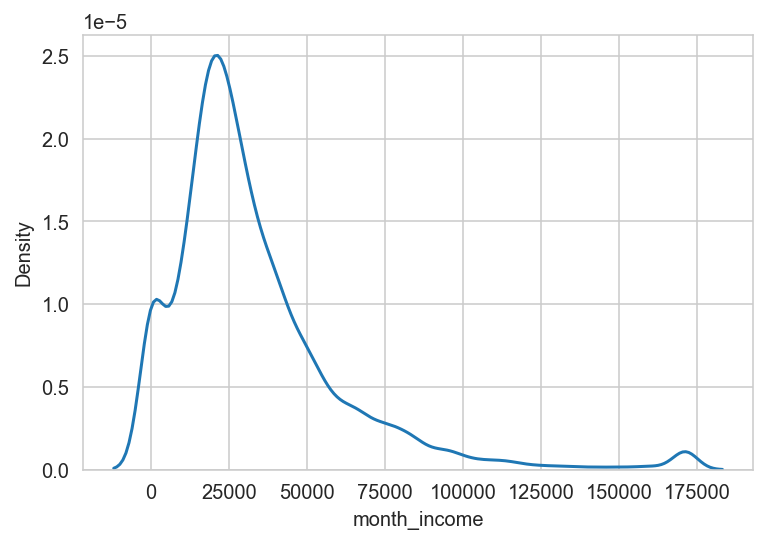

In [146]:
sns.kdeplot(dfa.month_income * 12)

In [147]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,18973.0,514972.018131,39779.554409,447910.000000,479940.000000,512130.000000,550290.000000,589670.000000
ymn,18973.0,201849.529542,89.618017,201608.000000,201804.000000,201812.000000,201907.000000,202008.000000
month,18973.0,6.410373,3.460226,1.000000,3.000000,6.000000,9.000000,12.000000
txns_count,18973.0,111.800780,58.857446,10.000000,70.000000,101.000000,143.000000,314.280000
txns_volume,18973.0,17806.013672,25605.660156,240.830002,5696.560059,9888.339844,18215.880859,178126.171875
month_income,18973.0,2767.024170,2355.527344,0.000000,1391.650024,2171.939941,3495.830078,14265.078125
year_income,18973.0,30220.160156,27550.628906,431.799988,13604.860352,22381.730469,38154.500000,332577.937500
month_income_mean,18973.0,2902.942139,2355.945557,423.258331,1488.578003,2185.785156,3553.006592,27714.828125
inflows,18973.0,806.842690,2719.715692,0.000000,0.000000,0.000000,400.000000,20617.549609
outflows,18973.0,802.820789,2514.825372,0.000000,0.000000,0.000000,437.000000,18503.080000
